## 앙상블(Ensemble) 학습
- Voting, Bagging, Boosting으로 구성

### 1. Voting
- 여러 개의 분류기(Classifier)를 사용하여 각각의 분류기 결과를 투표하여 예측   

- Hard Voting : 각각 분류기의 결과값 중 가장 많은 것을 따른다   
  cf) 성능이 높은 분류기만 선택되고 나머지는 배제되는 문제가 발생
- Soft Voting : 분류기의 확률을 더하고 각각 평균을 내서 확률이 제일 높은 값으로 결과값을 선정   
  cf)

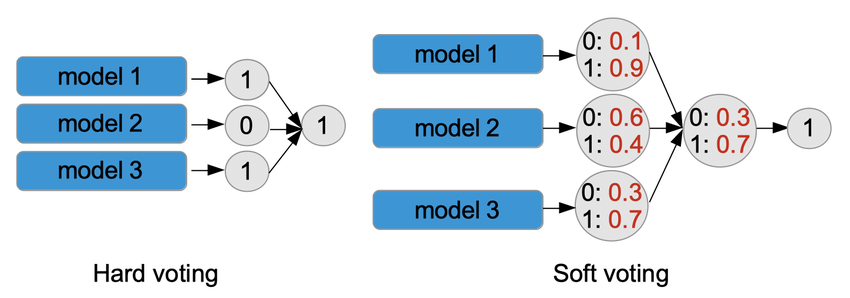

### 2. Bagging
- voting과 다르게 서로 같은 알고리즘의 분류기를 조합
- 개별 데이터의 중첩을 허락

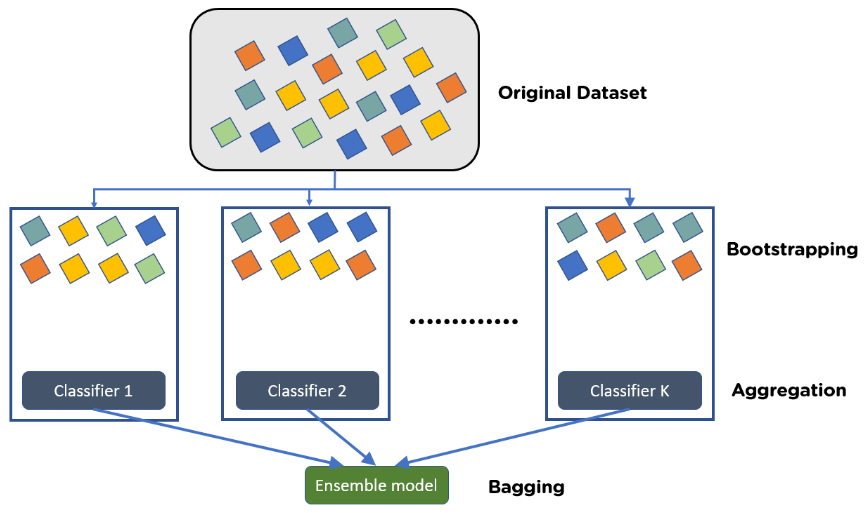

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [5]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# 2개의 서로 다른 모델(로지스틱 회귀, KNN)과 VotingClassifier를 설정
lr_clf = LogisticRegression(solver="liblinear")
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting="soft") # soft voting으로

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, cancer.target, test_size=0.2, random_state=42)

classifiers = [lr_clf, knn_clf, vo_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train) # 각각의 모델에 대해 학습
  y_pred = classifier.predict(X_test)
  name = classifier.__class__.__name__
  print(f"{name} 정확도 : {accuracy_score(y_test, y_pred)}")

LogisticRegression 정확도 : 0.956140350877193
KNeighborsClassifier 정확도 : 0.956140350877193
VotingClassifier 정확도 : 0.9649122807017544


각각의 알고리즘일 때 보다 보팅 형식으로 묶어 사용했을 때 정확도 상승한 것을 확인할 수 있다

In [8]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

cancer = load_breast_cancer()
np.random.seed(9)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

params = {'n_estimators': [100], 'max_depth': [6, 8, 10, 12], 'min_samples_leaf': [8, 12, 18],
          'min_samples_split': [8, 16, 20]}

clf = RandomForestClassifier()
grid_clf = GridSearchCV(clf, param_grid=params, cv=2, n_jobs=-1) # -1은 CPU를 다 쓴다는 의미
grid_clf.fit(X_train, y_train)

print(f"최적의 파라미터\n{grid_clf.best_params_}")
print(f"최고 예측 정확도: {grid_clf.best_score_}")

최적의 파라미터
{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9406542236648892
